# Project Business Statistics: E-news Express



## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# complete the code below to load the dataset
df = pd.read_csv('/content/drive/MyDrive/Python Course/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(100, 6)

In [ ]:
#missing values
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


**There are no missing values for any of the 100 observations and their related features.**

#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**There are 100 records in the dataframe. There are 6 attributes. There are 4 attributes with object type, 1 float type and 1 integer type.**

In [ ]:
#coverting "objects" to "category" reduces the data space required to store the dataframe
#converts 'group', 'landing_page', 'converted', 'language_preferred'b into categorical data

for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    df[col] = df[col].astype('category')

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Getting the statistical summary for the numerical variables

In [ ]:
df.describe ()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**There are 100 records in the dataset. Average time spent on the page is 5.3778. Minimum time spent is 0.19 and maximum time spent on the page is 10.71 minutes.**





In [ ]:
df['group'].describe() #outputs the count, unique values, top value, frequency, and data type

,group
count,100
unique,2
top,control
freq,50


**The feature "group" has 2 unique values control and treatment groups.**

In [ ]:
df['converted'].describe() #outputs the count, unique values, top value, frequency, and data type

,converted
count,100
unique,2
top,yes
freq,54


**The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54.**

In [ ]:
df['landing_page'].describe()

,landing_page
count,100
unique,2
top,old
freq,50


In [ ]:
df['language_preferred'].describe()

,language_preferred
count,100
unique,3
top,Spanish
freq,34


#### Getting the statistical summary for the categorical variables

In [ ]:
# write your code here to print the categorical summary statistics
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['group', 'landing_page', 'converted', 'language_preferred'], dtype='object')


In [ ]:
#Value Counts for Each Categorical Column
    print(f"\nSummary for column: {col}")
    print(df[col].value_counts())
for col in categorical_columns:
    print(f"\nSummary for column: {col}")
    print(df[col].value_counts())


Summary for column: group
group
control      50
treatment    50
Name: count, dtype: int64

Summary for column: landing_page
landing_page
old    50
new    50
Name: count, dtype: int64

Summary for column: converted
converted
yes    54
no     46
Name: count, dtype: int64

Summary for column: language_preferred
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64


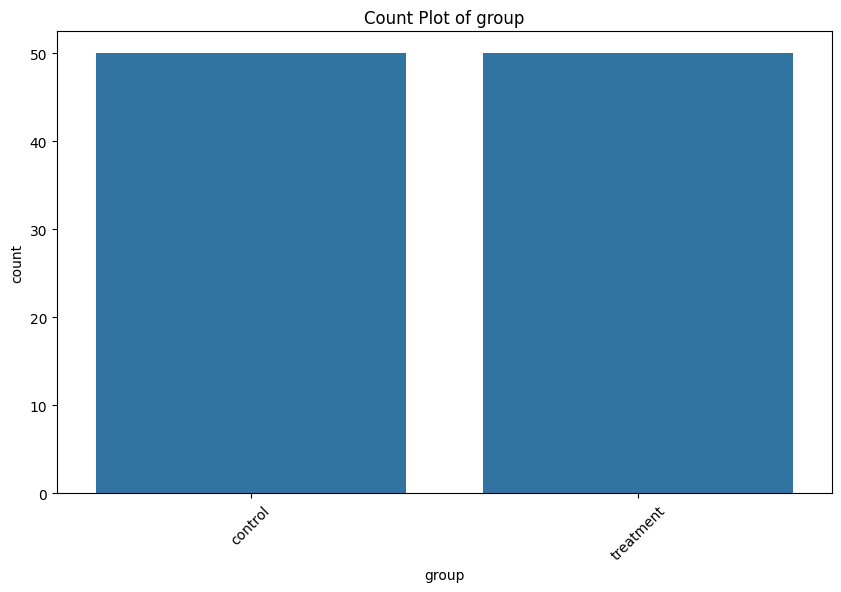

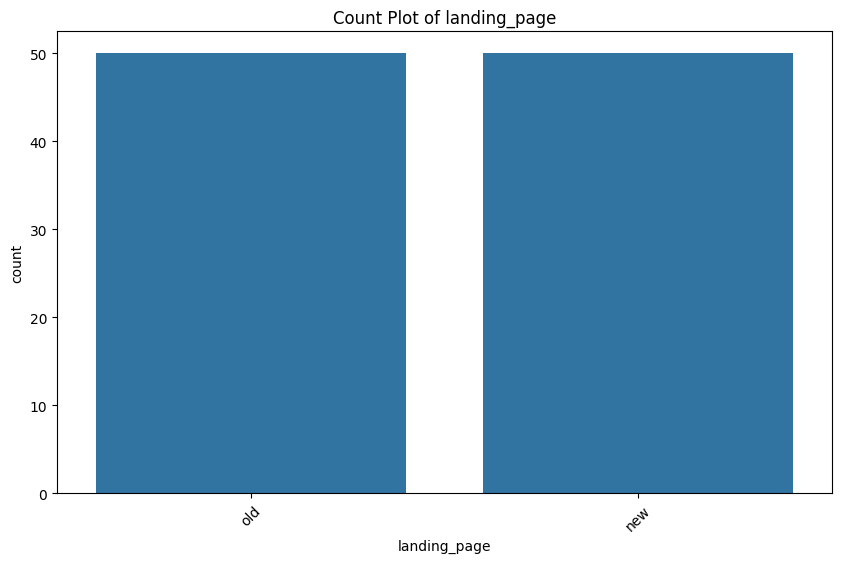

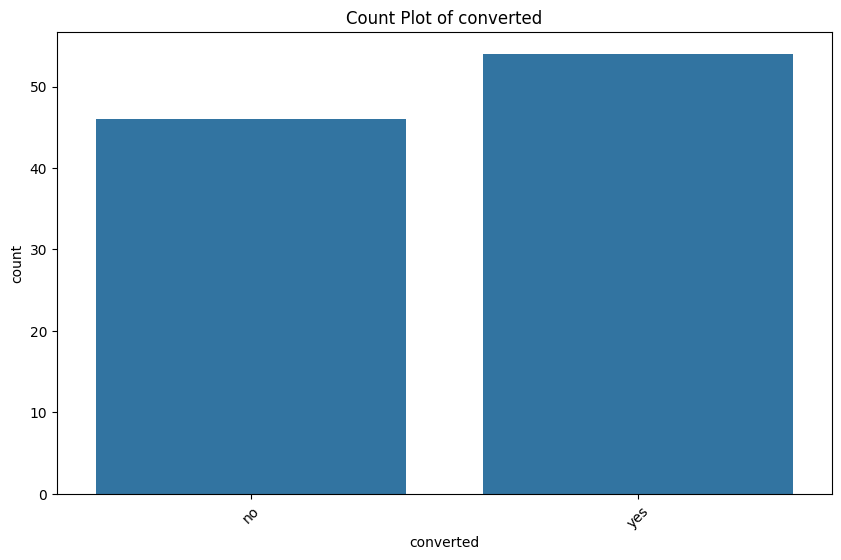

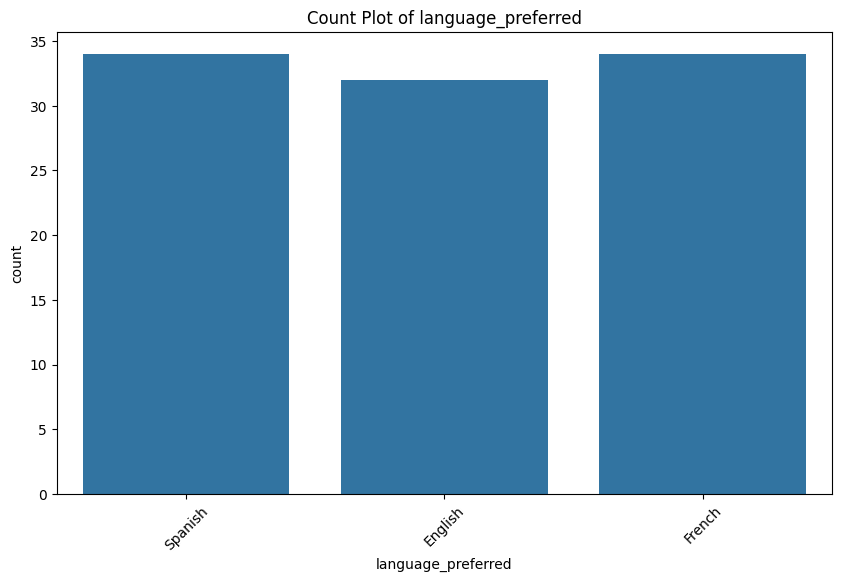

In [ ]:
# Visualize categorical data
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Check for missing values

In [ ]:
df.isna().apply(pd.value_counts)

<ipython-input-15-64dd6c23d1e6>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df.isna().apply(pd.value_counts)


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
False,100,100,100,100,100,100


In [ ]:
df.isnull().values.any()

False

There are no nulls in any of the attributes.


### Check for duplicates

In [ ]:
# write your code here
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


In [ ]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


### Univariate Analysis

#### Time spent on the page

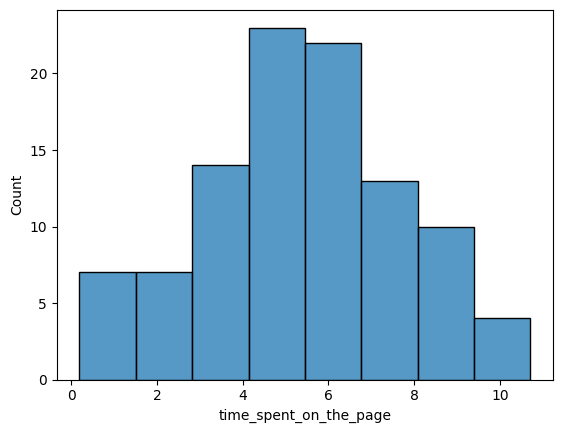

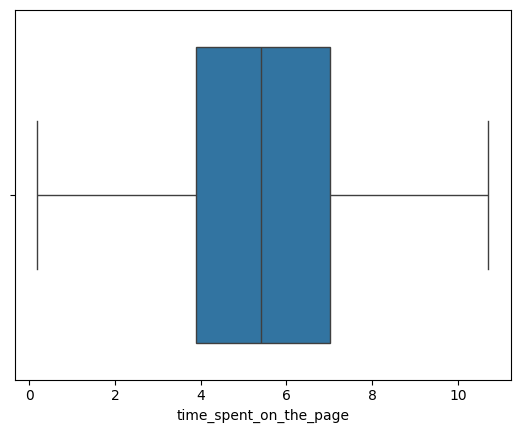

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()

sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()


**Time spent on page has few extreme values**

#### Group

In [ ]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


In [ ]:
group_counts = df['group'].value_counts()
print("Count of users in each group:")
print(group_counts)

Count of users in each group:
group
control      50
treatment    50
Name: count, dtype: int64


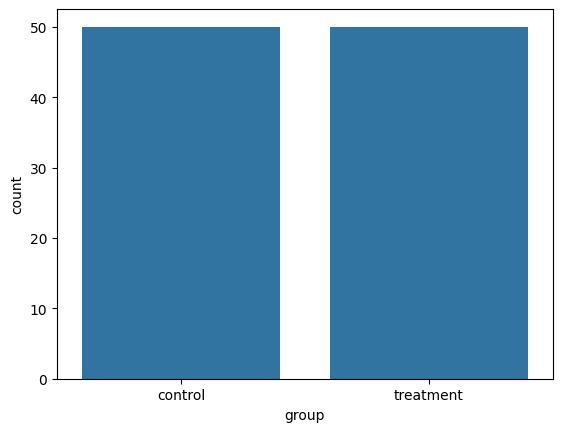

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

**Half of the users belongs to the first group (control) and half of users belong the second group (treatment)**

#### Landing page

In [ ]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


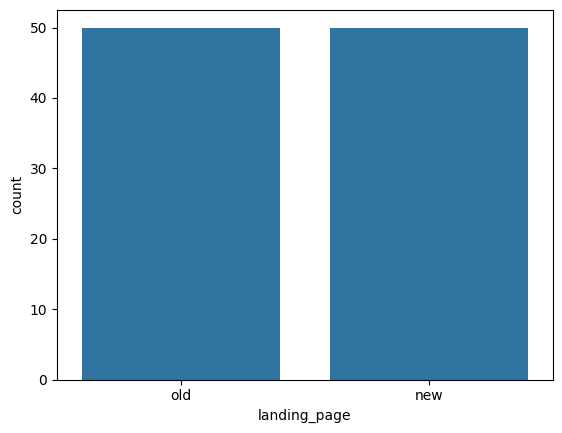

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


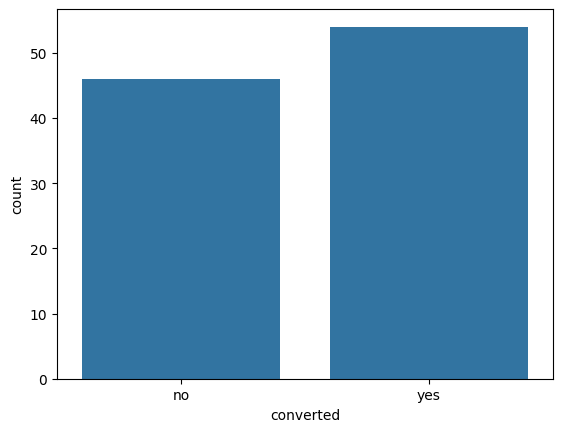

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.show()

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


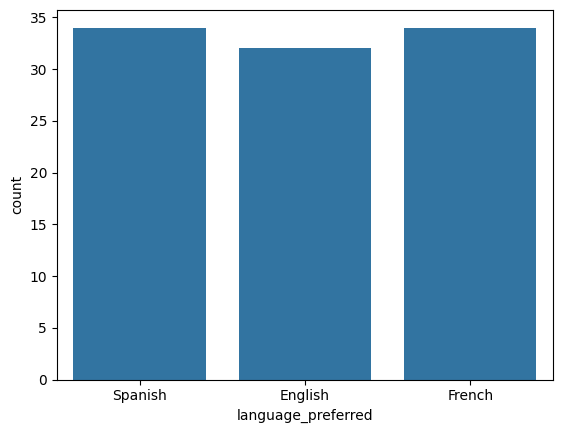

In [ ]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

Converted, landing page and language preferred are uniformly distributed.
Time spent on the page is unevenly distributed. There are three languages preferred (English, Spanish and French). Converted can be either Yes or No. Landing page can be either New or Old

### Bivariate Analysis

#### Landing page vs Time spent on the page

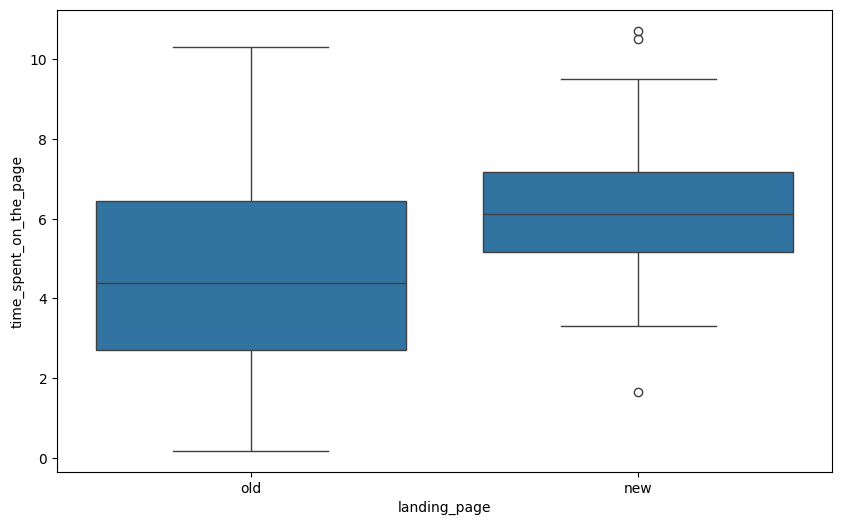

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Conversion status vs Time spent on the page

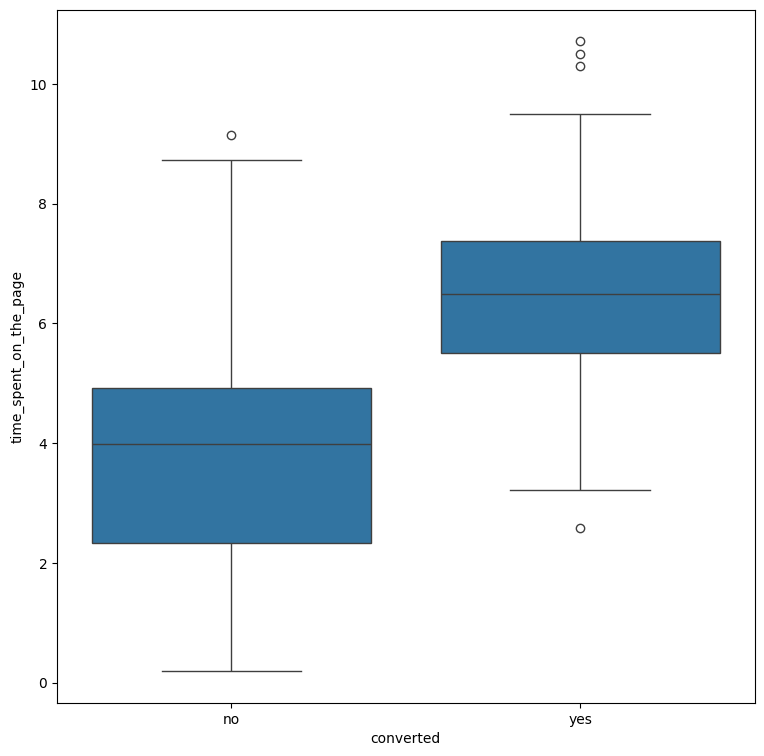

In [ ]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x ='converted', y = 'time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page

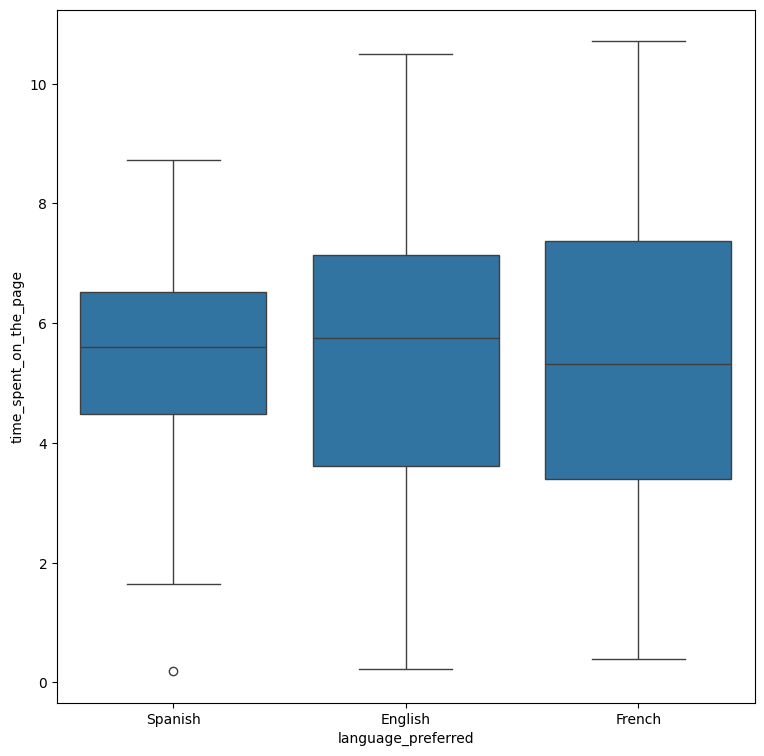

In [ ]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

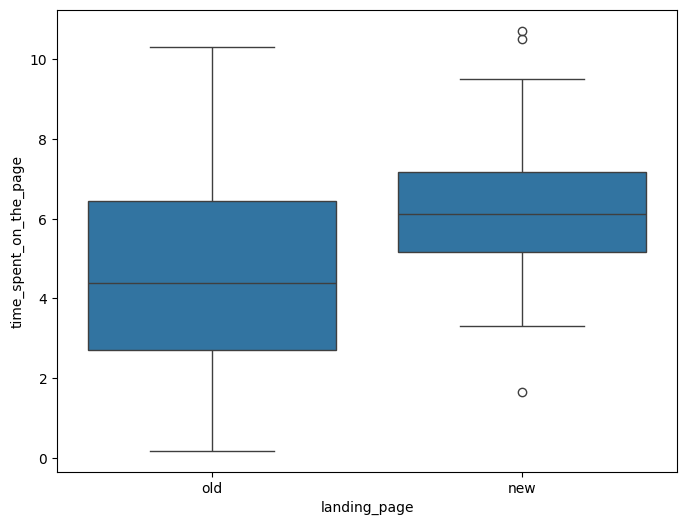

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

In [ ]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()


,time_spent_on_the_page
landing_page,
new,6.2232
old,4.5324


**It looks like users spend more time on the new landing page than the old landing page.**

### Step 1: Define the null and alternate hypotheses

$H_0$:Landing page has no effect on time spent on the page

$H_a$: Landing page has effect on time spent on the page



### Step 2: Select Appropriate test
**T Test to check dependency of time spent on landing page**



This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] =='old']['time_spent_on_the_page'] ##Complete the code

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

# Perform the Welch's t-test (two-sample t-test with unequal variances)
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False)

# Adjust p-value for one-tailed test
# For a one-tailed test, we need to adjust the two-tailed p-value.
# If the test statistic is positive and we're testing if time_spent_new > time_spent_old,
# we use p_value / 2. If the test statistic is negative and we're testing if time_spent_new < time_spent_old,
# we use 1 - (p_value / 2).
one_tailed_p_value = p_value / 2 if test_stat > 0 else 1 - (p_value / 2)

print('The one-tailed p-value is', one_tailed_p_value)

The one-tailed p-value is 0.0001392381225166549


In [ ]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

# Load your data (assuming df is already loaded; otherwise use pd.read_csv or other methods to load data)
# df = pd.read_csv('your_data_file.csv')  # Example of loading data if it's in a CSV file

# Create subsetted data frames for old and new landing pages
mu1 = df[df['landing_page'] == 'old']['time_spent_on_the_page']
mu2 = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Perform the paired t-test
test_stat, p_value = stats.ttest_rel(mu2, mu1)

# Print the test statistic and p-value for the two-sided test
print('Test Statistic:', test_stat)
print('Two-sided P-value:', p_value)
# Adjust p-value for a one-sided test (if the test statistic is positive and we're testing if mu2 > mu1)
alpha = 0.05
if test_stat > 0:
    p_value_one_sided = p_value / 2
else:
    p_value_one_sided = 1 - (p_value / 2)

print('One-sided P-value:', p_value_one_sided)


Test Statistic: 3.6700490533622028
Two-sided P-value: 0.0005982180187407595
One-sided P-value: 0.00029910900937037973


**Pulled from github 0.00299 real one**
Orignal code above

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0002784762450333098 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

 **We reject the null hypothesis, meaning the alternative hypothesis is true. Landing page has an effect on the time spent on the page. Users do spend more time on the new landing page than the old landing page**



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

In [ ]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['coverted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

KeyError: 'coverted'

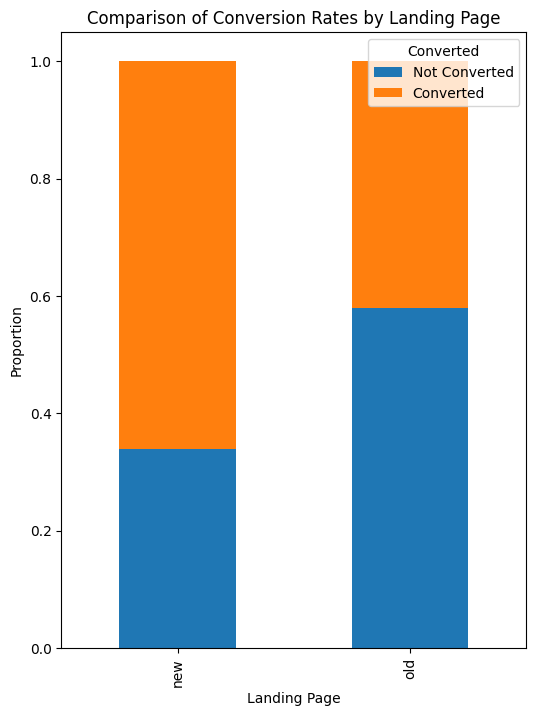

In [ ]:
# Create a crosstab to compute conversion rates by landing page
conversion_rates = pd.crosstab(df['landing_page'], df['converted'], normalize='index')

# Plot the conversion rates as a stacked bar chart
conversion_rates.plot(kind="bar", stacked=True, figsize=(6, 8))

# Set labels and title
plt.title('Comparison of Conversion Rates by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Proportion')
plt.legend(title='Converted', labels=['Not Converted', 'Converted'])

# Show the plot
plt.show()

**Visually there is no clear evidence to say conversion rate of new page is greater than old page**

### Step 1: Define the null and alternate hypotheses

$H_0:$ Landing page has no effect on conversion

$H_a:$ Landing page has an effect on conversion



### Step 2: Select Appropriate test
Z test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# Import necessary libraries
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Set the counts of converters
converter_count = np.array([21, 33])

# Set the sample sizes
nobs = np.array([50, 50])

# Perform the z-test for proportions
test_stat, p_value = proportions_ztest(converter_count, nobs)

# Print the results
print('The p-value is', p_value)

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

**We reject the null hypothesis, meaning the alternative hypothesis is true.  Landing page has an effect on conversion as the p value (0.008)<0.05**



## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

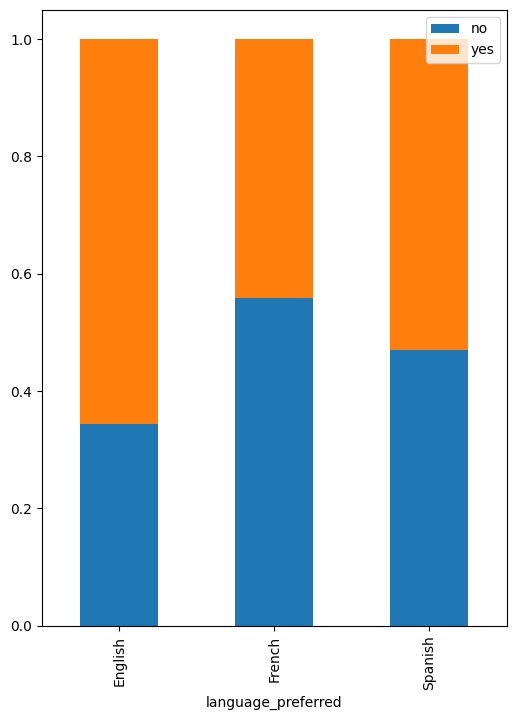

In [ ]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0:$ Language has no effect on conversion

$H_a:$ Language has an effect on conversion



### Step 2: Select Appropriate test
Chi Squared

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


**Conversion does not depend on preferred language **

---



### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for converted status and preferred language
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Perform the Chi-Square Test of Independence
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

**Language has no effet on the conversion as p_value 0.213 > 0.05 , we fail to reject null hypothesis **



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

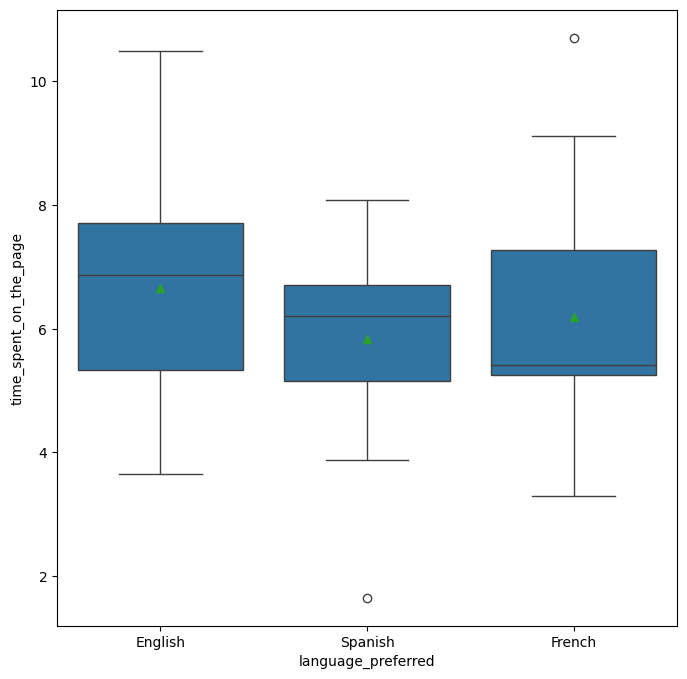

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y ='time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [ ]:
# Filter the DataFrame for users who saw the new landing page
df_new = df[df['landing_page'] == 'new']

# Group by preferred language and calculate the mean time spent on the page
mean_time_by_language = df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

print(mean_time_by_language)

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


### Step 1: Define the null and alternate hypotheses

$H_0:$ Preferred language has no effect on time spent

$H_a:$ Preferred language has an effect on time spent



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:

# Create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']

# Import the required function for ANOVA
from scipy.stats import f_oneway

# Perform the ANOVA test
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 5: Calculate the p-value

### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Preferred language has no effect on time spent as the p value (0.432) > 0.05



## Conclusion and Business Recommendations


Conclusion

The analysis revealed that the new landing page significantly increases user engagement and conversion rates compared to the old page.
Users spent more time on the new page and were more likely to subscribe.
Language preference did not significantly affect time spent or conversion rates.



Business Reccomendations

E-news Express should fully transition to the new landing page to capitalize on its improved user engagement and higher conversion rates.
The old landing page should be discontinued to avoid shortcomings.
The current language options should be kept the same as they do not seem to impact user behavior.


___